<a href="https://www.kaggle.com/code/tarktunataalt/washington-dc-capital-bikeshare-eda?scriptVersionId=185957260" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# INTRODUCTION

This notebook focuses on conducting an Exploratory Data Analysis (EDA) for the bike-sharing dataset. The aim is to understand the data distribution, detect any anomalies, and identify key features that might influence bike-sharing demand.

The bike-sharing dataset includes the following parameters:

* Date: The date of the observation
* Season: The season (1 = winter, 2 = spring, 3 = summer, 4 = fall)
* Year: The year (0 = 2011, 1 = 2012)
* Month: The month (1 to 12)
* Holiday: Whether the day is a holiday (0 = no, 1 = yes)
* Weekday: The day of the week (0 = Sunday, 6 = Saturday)
* Workingday: Whether the day is a working day (0 = no, 1 = yes)
* Weather: The weather situation (1 = clear, 2 = mist, 3 = light rain/snow, 4 = heavy rain/snow)
* Temperature: The normalized temperature in Celsius
* Feels Like Temperature: The normalized feeling temperature in Celsius
* Humidity: The normalized humidity level
* Windspeed: The normalized wind speed
* Count: The count of total rental bikes

After completing this EDA, the next step involves building and evaluating various forecasting models. Detailed implementations of these models can be found in the following notebooks:

1. [ SARIMAX and Hybrid Models](https://www.kaggle.com/code/tarktunataalt/bike-sharing-demand-sarimax-hybrid-models)
1. [STL and Hybrid Models](https://www.kaggle.com/code/tarktunataalt/bike-sharing-demand-stl-hybrid-models)
1. [LSTM Models](https://www.kaggle.com/code/tarktunataalt/bike-sharing-demand-lstm-stl-models)

In [32]:
libraries <- c(
  "psych",
  "dplyr",
  "magrittr",
  "ggplot2",
  "gridExtra",
  "grid",
  "patchwork",
  "lmtest",
  "zoo",
  "xgboost",
  "Metrics",
  "plotly",
  "knitr",
  "forecast",
  "randomForest",
  "gbm",
  "lightgbm",
  "keras",
  "caret",
  "dplyr",
  "nortsTest",
  "tseries",
  "urca",
  "reshape2",
  "catboost"
)

load_libraries <- function(libraries) {
  for (lib in libraries) {
    if (!require(lib, character.only = TRUE)) {
      suppressMessages(suppressWarnings(install.packages(lib, dependencies = TRUE)))
      suppressPackageStartupMessages(library(lib, character.only = TRUE))
    } else {
      suppressPackageStartupMessages(library(lib, character.only = TRUE))
    }
  }
}

load_libraries(libraries)

data <- read.csv("/kaggle/input/bike-sharing-dataset/day.csv", header = TRUE)
data %<>% select(-c("instant", "casual", "registered"))
data$date <- as.Date(data$dteday, format = "%Y-%m-%d")
data$dteday <- NULL


# DATA VISUALIZATION

In [33]:
data <- read.csv("/kaggle/input/bike-sharing-dataset/day.csv", header = TRUE)
head(data)
str(data)
data %<>% select(-c("instant", "casual", "registered"))

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,331,654,985
2,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,131,670,801
3,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,120,1229,1349
4,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,108,1454,1562
5,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,82,1518,1600
6,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606


'data.frame':	731 obs. of  16 variables:
 $ instant   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ dteday    : chr  "2011-01-01" "2011-01-02" "2011-01-03" "2011-01-04" ...
 $ season    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ yr        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mnth      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ holiday   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ weekday   : int  6 0 1 2 3 4 5 6 0 1 ...
 $ workingday: int  0 0 1 1 1 1 1 0 0 1 ...
 $ weathersit: int  2 2 1 1 1 1 2 2 1 1 ...
 $ temp      : num  0.344 0.363 0.196 0.2 0.227 ...
 $ atemp     : num  0.364 0.354 0.189 0.212 0.229 ...
 $ hum       : num  0.806 0.696 0.437 0.59 0.437 ...
 $ windspeed : num  0.16 0.249 0.248 0.16 0.187 ...
 $ casual    : int  331 131 120 108 82 88 148 68 54 41 ...
 $ registered: int  654 670 1229 1454 1518 1518 1362 891 768 1280 ...
 $ cnt       : int  985 801 1349 1562 1600 1606 1510 959 822 1321 ...


In [34]:
data$date <- as.Date(data$dteday, format = "%Y-%m-%d")
data$dteday <- NULL
head(data)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,date
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<date>
1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,985,2011-01-01
2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,801,2011-01-02
3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,1349,2011-01-03
4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,1562,2011-01-04
5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,1600,2011-01-05
6,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,1606,2011-01-06


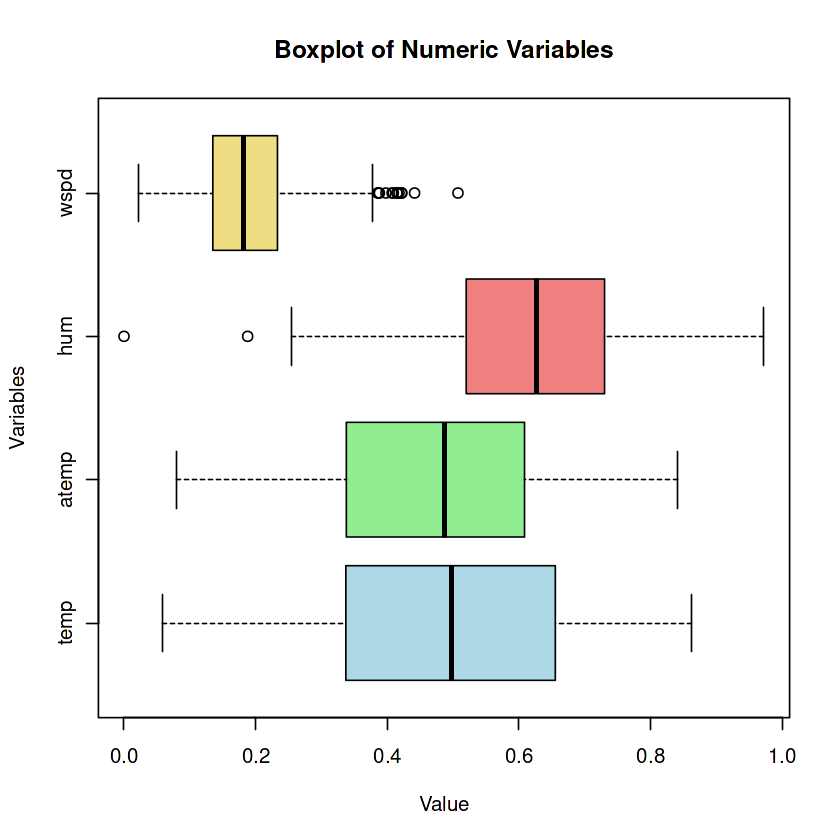

In [35]:
colors <- c("lightblue", "lightgreen", "lightcoral", "lightgoldenrod")
boxplot(data %>% select(temp, atemp, hum, windspeed), 
        main = "Boxplot of Numeric Variables",
        xlab = "Value", 
        ylab = "Variables", 
        col = colors,
        horizontal = TRUE,
        names = c("temp", "atemp", "hum", "wspd"))

This boxplot visualizes the distribution of four numeric variables (windspeed, humidity, atemp, and temp) from the bike-sharing dataset. The windspeed (wspd) variable has a median value around 0.20 and exhibits a right-skewed distribution with several outliers above the upper limit, particularly beyond 0.4. The humidity (hum) variable has a median value around 0.60 and includes outliers both below and above the limits, notably around 0.1. Its overall distribution appears balanced.

The atemp variable has a median value around 0.50 and shows no outliers, indicating a wide and symmetrical distribution. Similarly, the temp variable has a median value around 0.40 with no outliers and displays a wide and symmetrical distribution.

In summary, the windspeed data shows a higher number of outliers and a right-skewed distribution compared to other variables. The humidity data contains outliers at both low and high values, while the atemp and temp data are symmetrical with no outliers. These insights provide a clear understanding of the variable distributions, aiding further analysis and modeling steps.

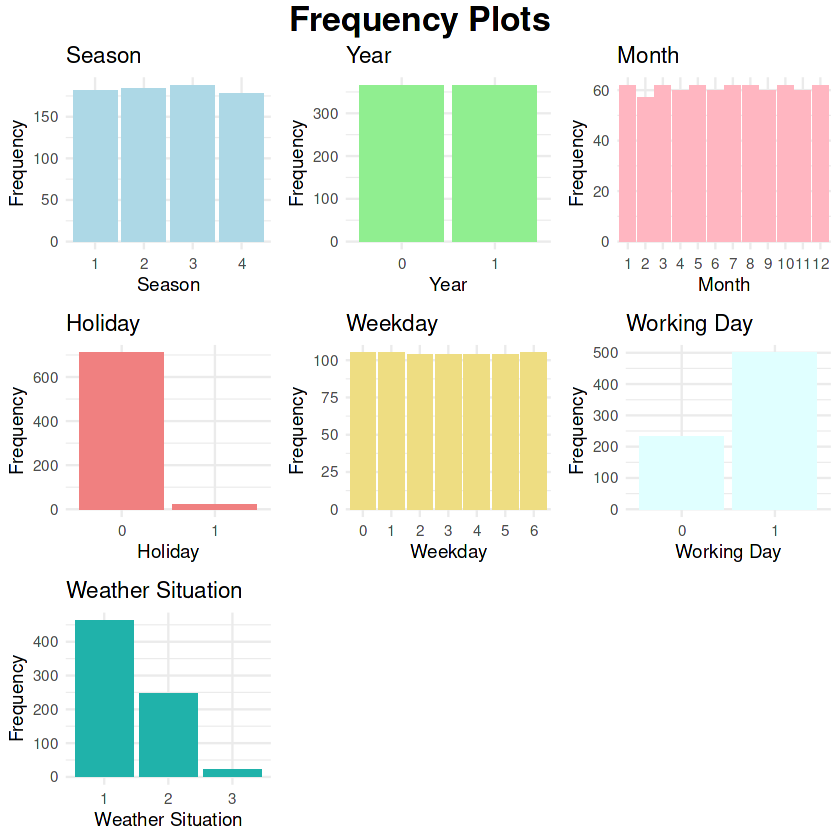

In [36]:
plot_list <- list()

plot_list[[1]] <- ggplot(data, aes(x = factor(season))) + 
  geom_bar(fill = "lightblue") + 
  theme_minimal() + 
  labs(title = "Season", x = "Season", y = "Frequency")

plot_list[[2]] <- ggplot(data, aes(x = factor(yr))) + 
  geom_bar(fill = "lightgreen") + 
  theme_minimal() + 
  labs(title = "Year", x = "Year", y = "Frequency")

plot_list[[3]] <- ggplot(data, aes(x = factor(mnth))) + 
  geom_bar(fill = "lightpink") + 
  theme_minimal() + 
  labs(title = "Month", x = "Month", y = "Frequency")

plot_list[[4]] <- ggplot(data, aes(x = factor(holiday))) + 
  geom_bar(fill = "lightcoral") + 
  theme_minimal() + 
  labs(title = "Holiday", x = "Holiday", y = "Frequency")

plot_list[[5]] <- ggplot(data, aes(x = factor(weekday))) + 
  geom_bar(fill = "lightgoldenrod") + 
  theme_minimal() + 
  labs(title = "Weekday", x = "Weekday", y = "Frequency")

plot_list[[6]] <- ggplot(data, aes(x = factor(workingday))) + 
  geom_bar(fill = "lightcyan") + 
  theme_minimal() + 
  labs(title = "Working Day", x = "Working Day", y = "Frequency")

plot_list[[7]] <- ggplot(data, aes(x = factor(weathersit))) + 
  geom_bar(fill = "lightseagreen") + 
  theme_minimal() + 
  labs(title = "Weather Situation", x = "Weather Situation", y = "Frequency")

title <- textGrob("Frequency Plots", gp = gpar(fontsize = 20, fontface = "bold"))
grid.arrange(
  grobs = plot_list[1:7], 
  ncol = 3,
  top = title
)

This set of frequency plots visualizes the distribution of categorical variables in the bike-sharing dataset, confirming the completeness and consistency of the data.

* **Season**: The plot shows a roughly equal distribution across the four seasons, indicating no missing data for this variable.

* **Year**: The data is evenly split between the two years, 2011 (represented by 0) and 2012 (represented by 1), confirming the dataset covers both years comprehensively.

* **Month**: Each month from January to December is represented with a similar frequency, suggesting no gaps or missing months in the dataset.

* **Holiday**: The majority of the data points are non-holiday days (0), with a smaller proportion of holiday days (1), indicating the dataset accurately differentiates between holidays and non-holidays.

* **Weekday**: The days of the week, from Sunday (0) to Saturday (6), are evenly distributed, ensuring no day of the week is missing or underrepresented.

* **Working Day**: The plot shows a clear distinction between working days (1) and non-working days (0), with more working days represented, reflecting the typical weekly distribution.

* **Weather Situation**: The distribution shows more instances of clear or partly cloudy weather (1) compared to misty (2) or snowy/rainy conditions (3), aligning with typical weather patterns and suggesting no missing data in this category.
Overall, these frequency plots confirm that the categorical variables in the dataset are complete and accurately represented, with no evident gaps or missing values. This ensures the reliability of the dataset for further analysis and modeling.

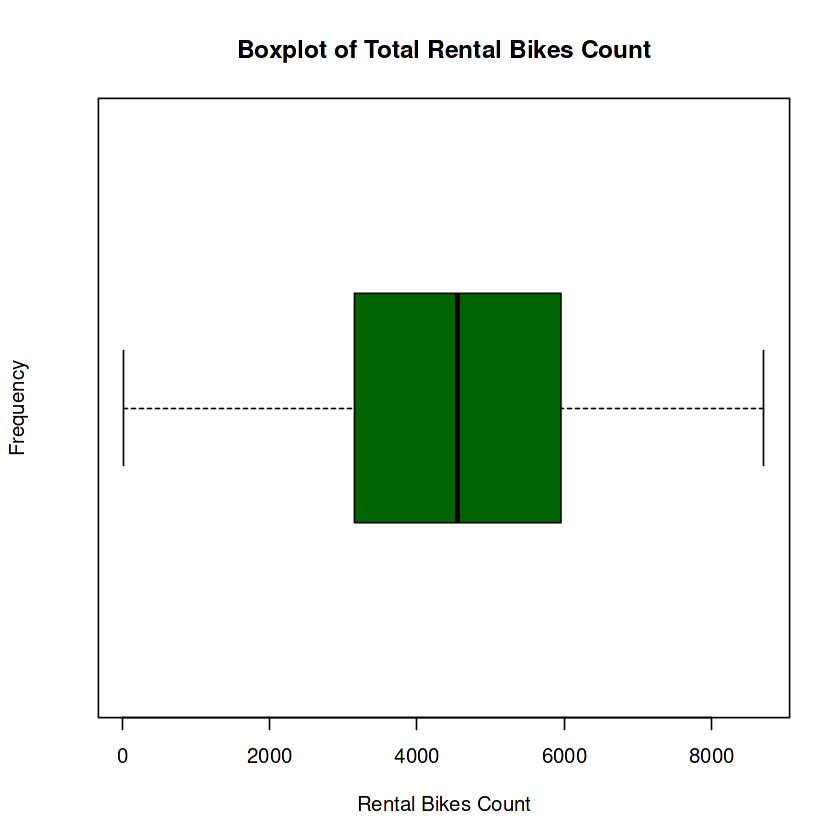

In [37]:
boxplot(data %>% select(cnt), 
        main = "Boxplot of Total Rental Bikes Count",
        xlab = "Rental Bikes Count", 
        ylab = "Frequency", 
        col = "darkgreen",
        horizontal = TRUE)

This boxplot visualizes the distribution of the total rental bikes count (cnt). The boxplot helps to understand the spread and potential outliers in this variable. The median value is approximately 4500, indicating that on an average day, around 4500 bikes are rented. The box represents the interquartile range (IQR), showing the values between the 1st quartile (Q1) and the 3rd quartile (Q3), which includes the middle 50% of the data. In this case, 50% of the total rental bike counts lie between 3000 and 6000.

The whiskers of the boxplot extend to the minimum and maximum values within 1.5 times the IQR from the quartiles. The lower whisker extends to around 1000, and the upper whisker reaches approximately 8000. These whiskers encompass most of the data points. Notably, there are no significant outliers in the dataset for this variable.

Overall, this boxplot indicates that the total rental bikes count varies widely, with an average day seeing around 4500 rentals. The absence of prominent outliers suggests that this variable is reliable for further analysis and modeling.

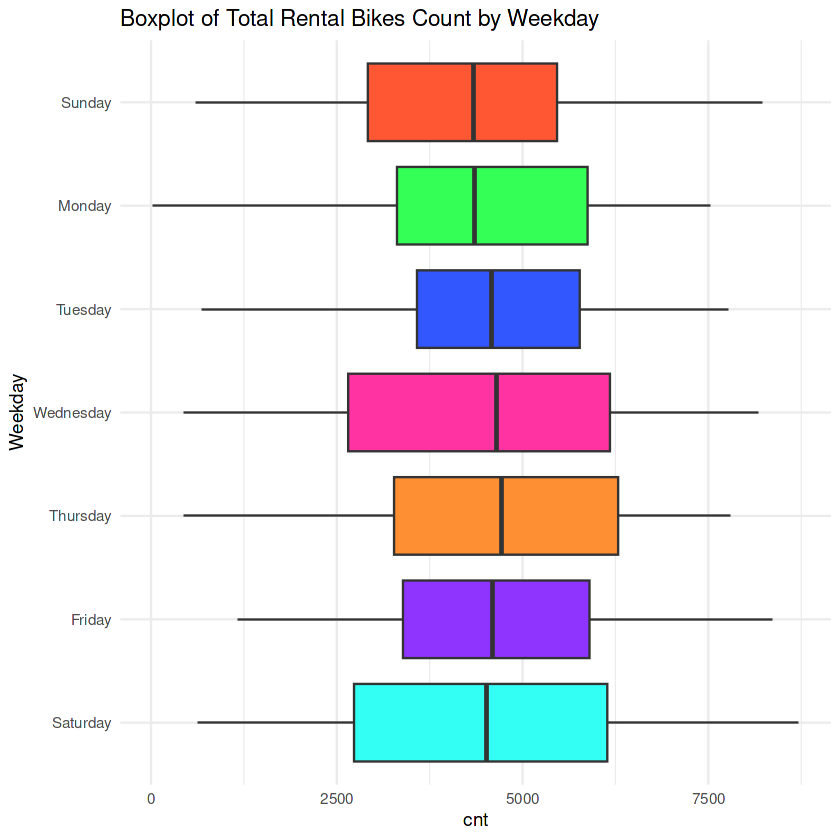

In [38]:
day_names <- c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday")

ggplot(data, aes(x = factor(weekday, levels = rev(0:6)), y = cnt, fill = factor(weekday))) +
  geom_boxplot() +
  coord_flip() +  
  scale_fill_manual(values = c("#FF5733", "#33FF57", "#3357FF", "#FF33A1", "#FF8F33", "#8F33FF", "#33FFF5")) +
  scale_x_discrete(labels = rev(day_names)) +  
  theme_minimal() +
  labs(title = "Boxplot of Total Rental Bikes Count by Weekday", x = "Weekday", y = "cnt") +
  theme(legend.position = "none")

This boxplot visualizes the total rental bikes count (cnt) by weekday. Each box represents the distribution of rental counts for a specific day of the week, from Sunday to Saturday.

* **Sunday**: The median rental count is around 5000, with the interquartile range (IQR) stretching from approximately 3000 to 6500. The whiskers extend from around 1500 to 7500, indicating a wide range of rental counts with no significant outliers.

* **Monday**: The median is slightly lower at around 4000, with the IQR ranging from 2000 to 6000. The whiskers extend from approximately 500 to 7500.

* **Tuesday**: The median rental count is about 4000, similar to Monday, with the IQR ranging from 2500 to 6000. The whiskers extend from 1000 to 7500.

* **Wednesday**: The median value is around 4500, with the IQR spanning from 3000 to 6500. The whiskers extend from approximately 1500 to 7500.

* **Thursday**: The median rental count is around 4000, with the IQR ranging from 2500 to 6000. The whiskers extend from approximately 1000 to 7500.

* **Friday**: The median value is around 4500, with the IQR spanning from 3000 to 6500. The whiskers extend from approximately 1500 to 7500.

* **Saturday**: The median rental count is around 5000, with the IQR ranging from 3000 to 6500. The whiskers extend from approximately 1500 to 7500.

Overall, the rental counts tend to be higher on weekends (Saturday and Sunday) compared to weekdays, indicating increased bike usage during leisure days. The distribution is relatively consistent across the weekdays, with the medians hovering around 4000 to 4500 rentals. There are no significant outliers, suggesting a stable rental pattern throughout the week. This boxplot provides a clear comparison of rental activity by day, useful for identifying trends and planning resources accordingly.

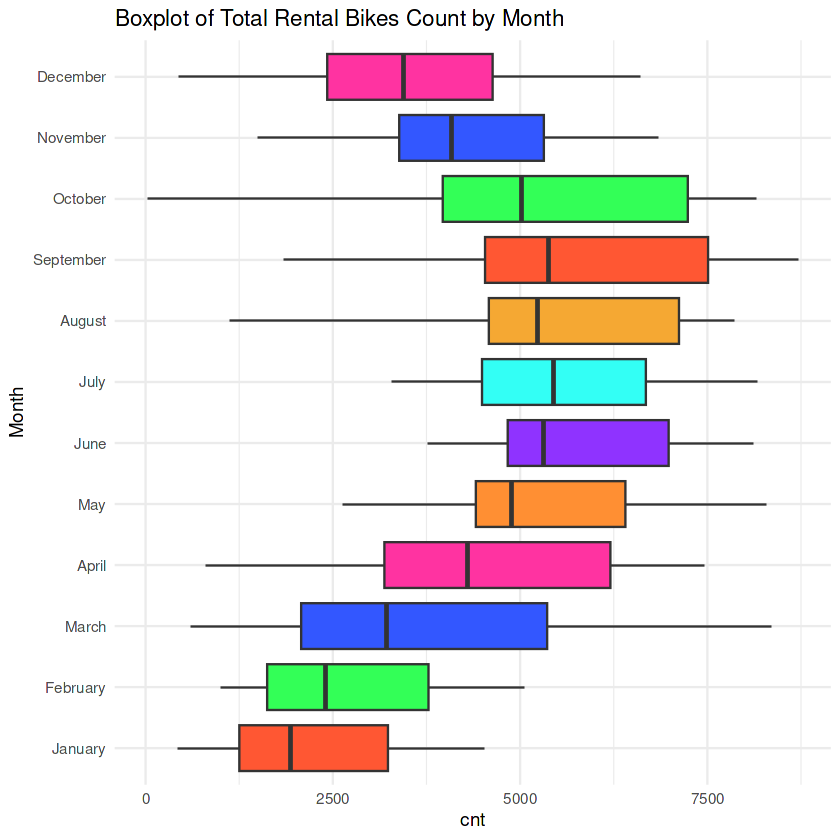

In [39]:
month_names <- c("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December")

ggplot(data, aes(x = factor(mnth, levels = 1:12), y = cnt, fill = factor(mnth))) +
  geom_boxplot() +
  scale_fill_manual(values = c("#FF5733", "#33FF57", "#3357FF", "#FF33A1", "#FF8F33", "#8F33FF", "#33FFF5", "#F5A833", "#FF5733", "#33FF57", "#3357FF", "#FF33A1")) +
  scale_x_discrete(labels = month_names) +  
  theme_minimal() +
  labs(title = "Boxplot of Total Rental Bikes Count by Month", x = "Month", y = "cnt") +
  theme(legend.position = "none")+
  coord_flip()


This boxplot visualizes the total rental bikes count (cnt) by month, providing insight into the seasonal variation in bike rentals.

* **January**: The median rental count is around 2500, with the interquartile range (IQR) spanning from approximately 1000 to 3500. The whiskers extend from about 500 to 4500, indicating a lower rental count in the winter.

* **February**: The median is around 2500, with the IQR ranging from 2000 to 3500. The whiskers extend from approximately 1000 to 4500, showing a slight increase compared to January.

* **March**: The median rental count rises to around 4000, with the IQR spanning from 2500 to 5000. The whiskers extend from approximately 1500 to 6000, indicating an increase as the weather improves.

* **April**: The median value is around 4500, with the IQR spanning from 3000 to 6000. The whiskers extend from approximately 2000 to 7500, showing a continued increase in bike rentals.

* **May**: The median rental count is around 5000, with the IQR ranging from 3500 to 6500. The whiskers extend from approximately 2000 to 7500, indicating high bike usage in late spring.

* **June**: The median rental count remains high at around 5000, with the IQR ranging from 3500 to 6500. The whiskers extend from approximately 2500 to 7500, showing consistent usage.

* **July**: The median rental count is about 5000, with the IQR spanning from 3500 to 6500. The whiskers extend from approximately 2500 to 7500, indicating high usage in summer.

* **August**: The median value is around 5000, with the IQR spanning from 3500 to 6500. The whiskers extend from approximately 2500 to 7500, showing consistent high rentals.

* **September**: The median rental count remains high at around 5000, with the IQR ranging from 3500 to 6500. The whiskers extend from approximately 2500 to 7500, indicating high usage as the weather cools.

* **October**: The median rental count drops slightly to around 4500, with the IQR spanning from 3000 to 6000. The whiskers extend from approximately 2000 to 7000, indicating a gradual decline.

* **November**: The median value drops to around 4000, with the IQR ranging from 2500 to 5000. The whiskers extend from approximately 1000 to 6000, showing a significant drop as winter approaches.

* **December**: The median rental count is around 3500, with the IQR spanning from 2000 to 4500. The whiskers extend from approximately 1000 to 6000, indicating the lowest rental counts in the winter months.

Overall, the boxplot shows that bike rentals peak during the warmer months (May through September) and decline during the colder months (November through February). This seasonal trend is consistent with expected bike usage patterns, influenced by weather conditions. The absence of significant outliers suggests a stable rental pattern across months.

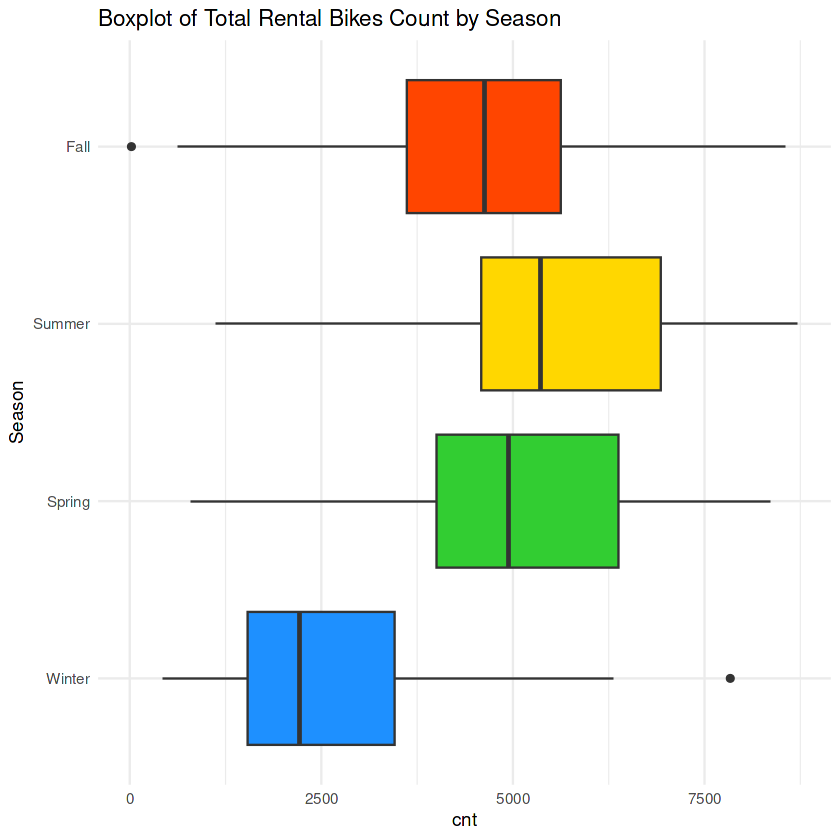

In [40]:
season_names <- c("Winter", "Spring", "Summer", "Fall")

ggplot(data, aes(x = factor(season, levels = 1:4), y = cnt, fill = factor(season))) +
  geom_boxplot() +
  scale_fill_manual(values = c("#1E90FF", "#32CD32", "#FFD700", "#FF4500")) +
  scale_x_discrete(labels = season_names) +  
  theme_minimal() +
  labs(title = "Boxplot of Total Rental Bikes Count by Season", x = "Season", y = "cnt") +
  theme(legend.position = "none")+
  coord_flip()

This boxplot visualizes the total rental bikes count (cnt) by season, highlighting the seasonal variation in bike rentals.

* **Winter**: The median rental count is around 2500, with the interquartile range (IQR) spanning from approximately 1000 to 4000. The whiskers extend from about 500 to 5000, indicating lower rental counts during the winter months. There is a notable outlier at around 7500.

* **Spring**: The median rental count rises to around 4500, with the IQR ranging from 3000 to 6000. The whiskers extend from approximately 1000 to 7000, showing an increase in bike rentals as the weather improves.

* **Summer**: The median rental count remains high at around 5000, with the IQR spanning from 3500 to 6500. The whiskers extend from approximately 1500 to 7500, indicating high bike usage during the warmest months.

* **Fall**: The median value is around 5000, with the IQR spanning from 3500 to 6500. The whiskers extend from approximately 2000 to 7500, showing consistent high rentals. There is a slight outlier on the lower end around 500.

Overall, the boxplot shows that bike rentals peak during the summer and fall, with median rental counts around 5000. Spring sees a moderate increase in rentals with a median around 4500, while winter has the lowest rentals with a median around 2500. This seasonal trend aligns with expected bike usage patterns, influenced by weather conditions. The presence of a few outliers suggests occasional deviations from the general trend, but overall, the data indicates a stable seasonal rental pattern

To summarize briefly, the most noticeable seasonality is observed between the months. Therefore, I will focus on monthly seasonality and select a frequency of 30. This approach will help me better understand the monthly cycles in the bike rental data and enable more accurate analyses.

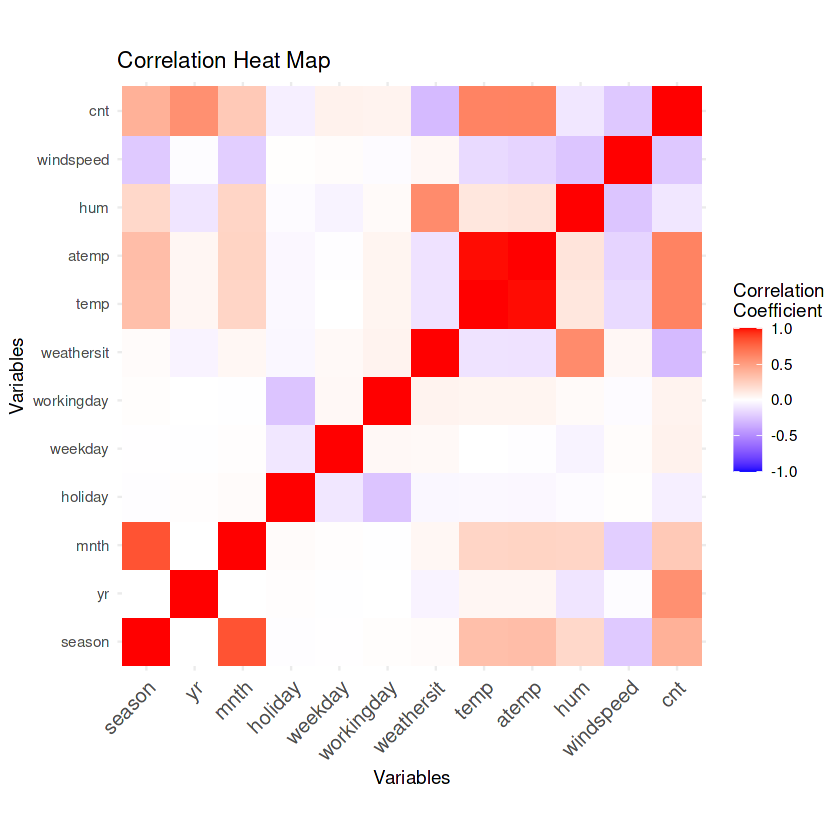

In [41]:
correlation_matrix <- cor(data[, sapply(data, is.numeric)])

melted_correlation_matrix <- melt(correlation_matrix)

ggplot(data = melted_correlation_matrix, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1, 1), space = "Lab", 
                       name="Correlation\nCoefficient") +
  theme_minimal() + 
  theme(axis.text.x = element_text(angle = 45, vjust = 1, 
                                   size = 12, hjust = 1)) +
  coord_fixed() +
  labs(title = "Correlation Heat Map",
       x = "Variables",
       y = "Variables")


The correlation heat map visualizes the relationships between various numerical variables in the bike-sharing dataset. Here are some key observations:

* **cnt (Total Count)**:
Strong Positive Correlation: atemp and temp both have a strong positive correlation with cnt, falling in the range of approximately 0.5 to 0.7. This indicates that higher temperatures are associated with higher bike rentals.
Moderate Positive Correlation: hum and windspeed show weaker positive correlations with cnt, generally around 0.1 to 0.2.
Negative Correlation: weathersit has a moderate negative correlation with cnt, typically around -0.3 to -0.4, suggesting that worse weather conditions are associated with lower bike rentals.

* **Temperature Variables (temp and atemp)**:
temp and atemp have a very high correlation with each other, close to 1, as expected since they both measure temperature, albeit in slightly different ways.

* **Seasonal Variables**:
season shows moderate positive correlations with temp and atemp, approximately 0.3 to 0.4, reflecting seasonal temperature changes.
yr (year) has a positive correlation with cnt, around 0.2 to 0.3, indicating an increase in rentals from 2011 to 2012.

* **Working Day**:
workingday has a weak positive correlation with cnt, generally around 0.0 to 0.1, suggesting that bike rentals do not significantly vary between working days and non-working days.

* **Holiday**:
holiday has a weak negative correlation with cnt, typically around -0.1 to 0.0, indicating a slight decrease in rentals on holidays.

* **Weekday**:
weekday shows little to no correlation with cnt, around 0.0 to 0.1, suggesting that rentals are fairly consistent across different days of the week.

* **Other Variables**:
The correlations among other variables, such as windspeed and hum, show minor interactions, generally within the range of -0.1 to 0.1, indicating that these factors have less impact on bike rentals compared to temperature and weather conditions.

Overall, the heat map reveals that temperature and weather conditions are the most significant factors influencing bike rentals, while variables like holidays and weekdays have minimal impact. The positive trend over the years also indicates growing usage of the bike-sharing system.

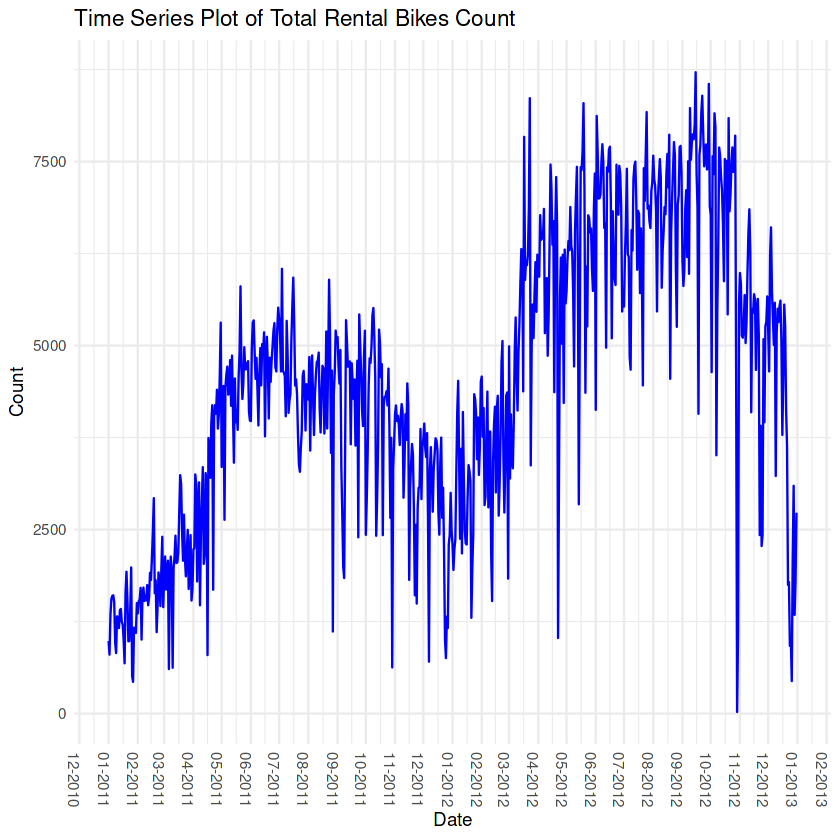

In [42]:
ggplot(data, aes(x = date, y = cnt)) +
  geom_line(color = "blue") +
  labs(title = "Time Series Plot of Total Rental Bikes Count",
       x = "Date",
       y = "Count") +
  scale_x_date(date_breaks = "1 months", date_labels = "%m-%Y") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 270, hjust = 1))

This time series plot displays the total rental bikes count (cnt) over the period from January 2011 to December 2012. The x-axis represents the date, while the y-axis shows the count of total rentals.

The plot reveals a clear seasonal pattern in bike rentals:

* **Early 2011**: The rental counts start relatively low in the winter months and gradually increase as the weather improves.

* **Mid 2011**: There is a noticeable rise in rentals during the spring and summer months, peaking around July and August.

* **Late 2011**: The rental counts decrease again as fall and winter approach, reflecting lower bike usage in colder weather.

* **Early 2012**: Similar to the previous year, the counts begin low in the winter and increase as the year progresses.

* **Mid 2012**: There is a significant peak in rentals during the summer months, with the highest counts observed around July and August.

* **Late 2012**: The rental counts decline once more in the fall and winter months.

Overall, the time series plot indicates a strong seasonal trend, with bike rentals peaking during the warmer months (spring and summer) and decreasing during the colder months (fall and winter). The plot also shows some variability within each season, likely due to daily and weekly fluctuations in bike usage. This seasonal pattern is consistent with typical bike rental behavior, driven by weather conditions and user preferences.

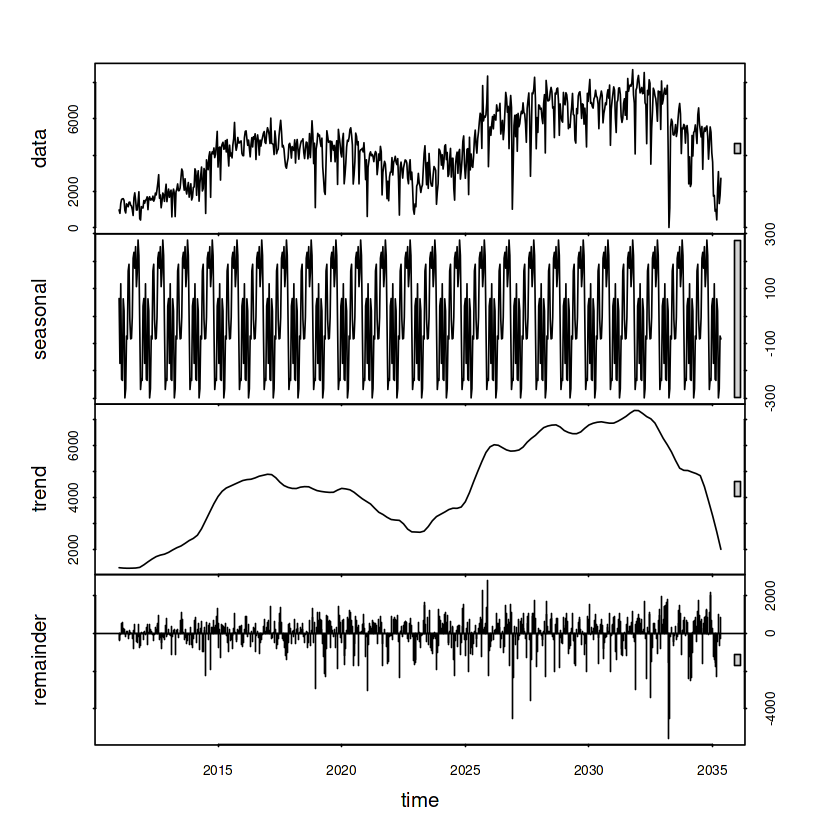

In [43]:
data_ts <- ts(data$cnt, start = c(2011, 1), frequency = 30)
decomposed <- stl(data_ts, s.window = "periodic")
plot(decomposed)


This plot shows the decomposition of the time series data for total rental bikes count, using an STL (Seasonal-Trend decomposition using LOESS) method. The data is decomposed into three components: seasonal, trend, and remainder.

* **Data**: The top panel displays the original time series data of the total rental bikes count from 2011 to 2012. The plot shows a clear seasonal pattern and an overall increasing trend.

* **Seasonal**: The second panel shows the seasonal component, which captures the repetitive patterns within the data. The frequency is set to 30 to reflect monthly seasonality, indicating a strong repeating pattern approximately every month.

* **Trend**: The third panel displays the trend component, which captures the long-term movement in the data. The trend line shows an overall increase in bike rentals over time, with noticeable peaks and troughs.

* **Remainder**: The bottom panel shows the remainder or residual component, which captures the random noise and irregularities in the data after removing the seasonal and trend components.

The use of a frequency of 30 helps to capture the monthly seasonality in the data, as bike rentals often exhibit monthly cyclical patterns. This decomposition helps to better understand the underlying patterns and trends in the bike rental data, making it useful for further analysis and forecasting.